In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import os
os.chdir("D:\PGA16")

In [3]:
df=pd.read_csv("daily-total-female-births-CA.csv")

In [4]:
df.head()

date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

In [13]:
df.tail()

date  births
360  1959-12-27      37
361  1959-12-28      52
362  1959-12-29      48
363  1959-12-30      55
364  1959-12-31      50

In [11]:
import matplotlib.pyplot as plt
%matplotlib qt
%matplotlib inline

<AxesSubplot:>

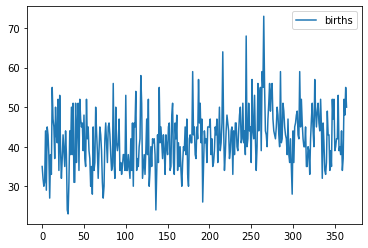

In [12]:
 df.plot()

In [9]:
df.describe()

births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000

In [17]:
from statsmodels.tsa.stattools import adfuller
X = df.births.values
result = adfuller(X)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, abs(value))) 

ADF Statistic: -4.808
p-value: 0.000052
Critical Values:
	1%: 3.449
	5%: 2.870
	10%: 2.571


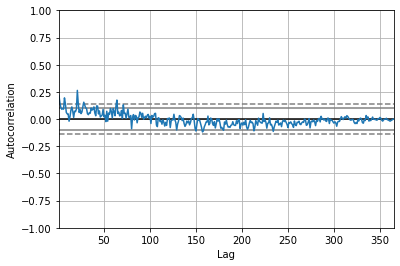

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['births'])
plt.show()

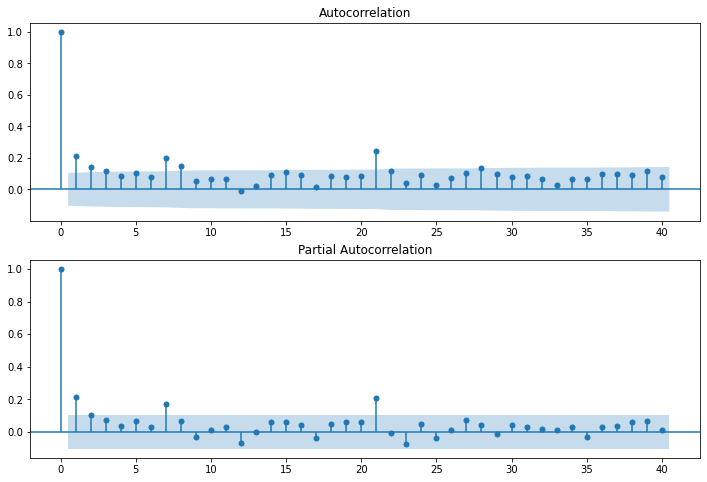

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['births'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['births'].iloc[13:],lags=40,ax=ax2)

In [20]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['births'],order=(3,0,2))
model_fit=model.fit()

C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [21]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 births   No. Observations:                  365
Model:                     ARMA(3, 2)   Log Likelihood               -1227.831
Method:                       css-mle   S.D. of innovations              6.989
Date:                Sun, 11 Apr 2021   AIC                           2469.662
Time:                        17:34:11   BIC                           2496.961
Sample:                             0   HQIC                          2480.511
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.7997      1.546     27.034      0.000      38.769      44.830
ar.L1.births     1.0936      1.050      1.042      0.298      -0.964       3.151
ar.L2.births    -0.0571      1.167     -0.049      0.961      -2.345       2.231
ar.L3.births    -0.0450      0.137     -0.328      0.743      -0.314       0.224
ma.L1.births    -0.9405      1.050     -0.895      0.371      -2.999       1.118
ma.L2.births    -0.0170      1.002     -0.017      0.986      -1.981       1.947
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0101           +0.0000j            1.0101            0.0000
AR.2            3.6878           +0.0000j            3.6878            0.0000
AR.3           -5.9662           +0.0000j            5.9662            0.5000
MA.1            1.0436           +0.0000j            1.0436            0.0000
MA.2          -56.4965           +0.0000j           56.4965            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

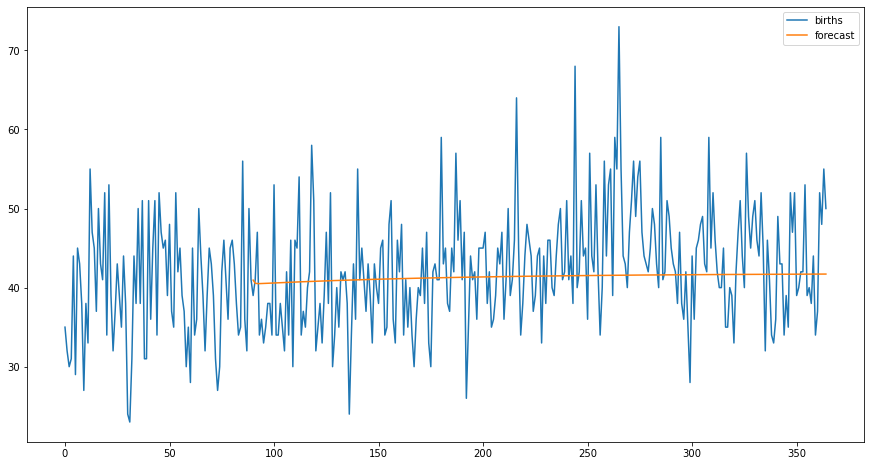

In [22]:
df['forecast']=model_fit.predict(start=90,end=364,dynamic=True)
df[['births','forecast']].plot(figsize=(15,8))

In [24]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['births'],order=(3, 0 , 2),seasonal_order=(3,0,2,12))
results=model.fit()

C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

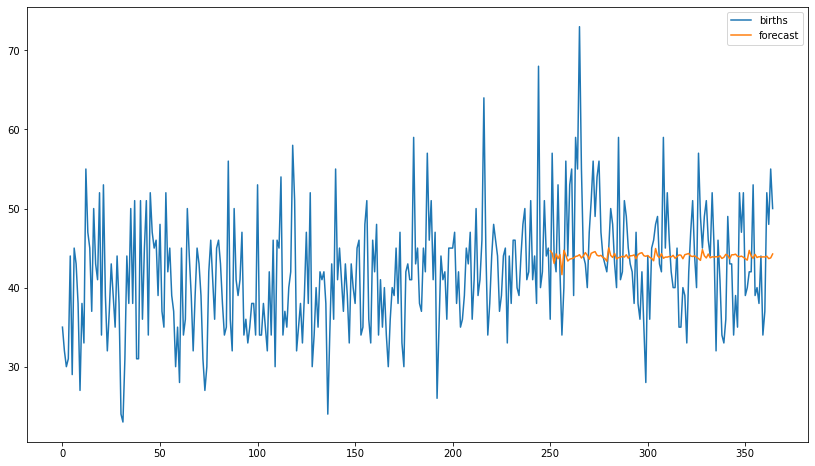

In [25]:
df['forecast']=results.predict(start=250,end=370,dynamic=True)
df[['births','forecast']].plot(figsize=(14,8))

# Differencing

In [99]:
df['births First Difference'] = df['births'] - df['births'].shift(1)

In [100]:
df.head()

date  births  births First Difference
0  1959-01-01      35                      NaN
1  1959-01-02      32                     -3.0
2  1959-01-03      30                     -2.0
3  1959-01-04      31                      1.0
4  1959-01-05      44                     13.0

In [101]:
df['Seasonal First Difference']=df['births']-df['births'].shift(12)

In [102]:
df.head(14)

date  births  births First Difference  Seasonal First Difference
0   1959-01-01      35                      NaN                        NaN
1   1959-01-02      32                     -3.0                        NaN
2   1959-01-03      30                     -2.0                        NaN
3   1959-01-04      31                      1.0                        NaN
4   1959-01-05      44                     13.0                        NaN
5   1959-01-06      29                    -15.0                        NaN
6   1959-01-07      45                     16.0                        NaN
7   1959-01-08      43                     -2.0                        NaN
8   1959-01-09      38                     -5.0                        NaN
9   1959-01-10      27                    -11.0                        NaN
10  1959-01-11      38                     11.0                        NaN
11  1959-01-12      33                     -5.0                        NaN
12  1959-01-13      55                     22.0                       20.0
13  1959-01-14      47                     -8.0                       15.0

In [103]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -8.38361486899636
p-value : 2.4720071731147017e-13
#Lags Used : 12
Number of Observations Used : 340
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

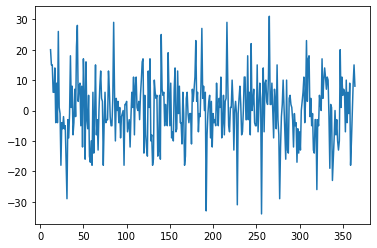

In [104]:
df['Seasonal First Difference'].plot()

In [105]:
from pandas.plotting import autocorrelation_plot

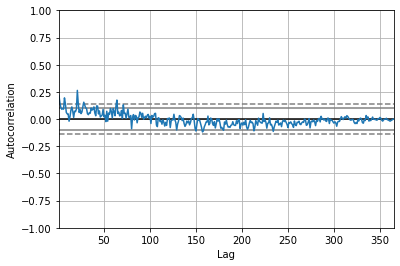

In [106]:

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['births'])
plt.show()

In [107]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [115]:
df

date  births  births First Difference  Seasonal First Difference
0    1959-01-01      35                      NaN                        NaN
1    1959-01-02      32                     -3.0                        NaN
2    1959-01-03      30                     -2.0                        NaN
3    1959-01-04      31                      1.0                        NaN
4    1959-01-05      44                     13.0                        NaN
..          ...     ...                      ...                        ...
360  1959-12-27      37                      3.0                      -10.0
361  1959-12-28      52                     15.0                        0.0
362  1959-12-29      48                     -4.0                        9.0
363  1959-12-30      55                      7.0                       15.0
364  1959-12-31      50                     -5.0                        8.0

[365 rows x 4 columns]

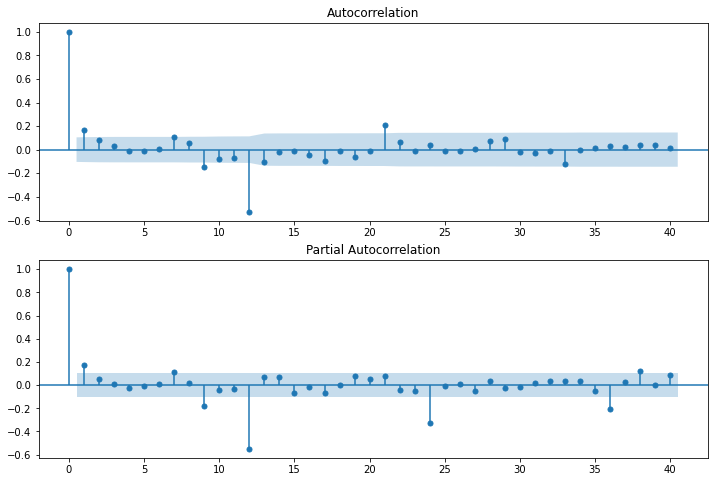

In [48]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [57]:
model=ARIMA(df['births'],order=(2,1,2))
model_fit=model.fit()

C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-pa

In [58]:
model_fit.summary()

C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.births   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1224.937
Method:                       css-mle   S.D. of innovations              6.955
Date:                Sat, 10 Apr 2021   AIC                           2461.875
Time:                        14:58:28   BIC                           2485.257
Sample:                             1   HQIC                          2471.168
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0196      0.005      3.608      0.000       0.009       0.030
ar.L1.D.births     0.9387        nan        nan        nan         nan         nan
ar.L2.D.births    -0.0673        nan        nan        nan         nan         nan
ma.L1.D.births    -1.7941        nan        nan        nan         nan         nan
ma.L2.D.births     0.7941        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1622           +0.0000j            1.1622            0.0000
AR.2           12.7848           +0.0000j           12.7848            0.0000
MA.1            1.0003           +0.0000j            1.0003            0.0000
MA.2            1.2589           +0.0000j            1.2589            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

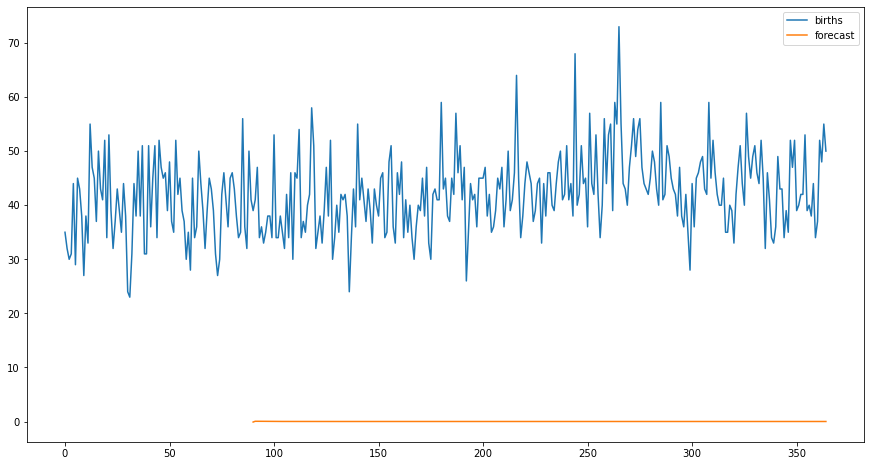

In [59]:
df['forecast']=model_fit.predict(start=90,end=364,dynamic=True)
df[['births','forecast']].plot(figsize=(15,8))

In [64]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['births'],order=(2, 1 , 2),seasonal_order=(2,1,2,12))
results=model.fit()

C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

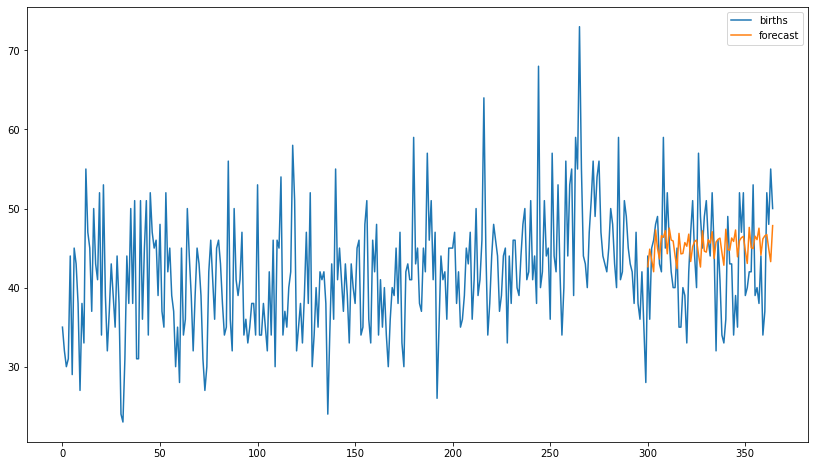

In [69]:

df['forecast']=results.predict(start=300,end=370,dynamic=True)
df[['births','forecast']].plot(figsize=(14,8))

In [70]:

model=sm.tsa.statespace.SARIMAX(df['births'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()

C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Sasi kumar G\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

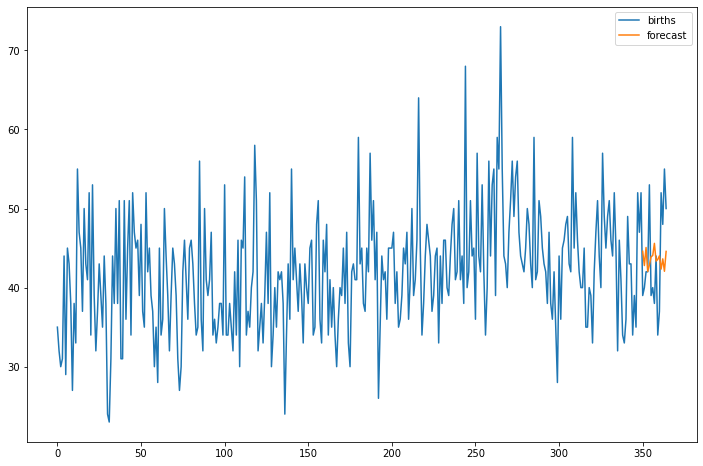

In [71]:
df['forecast']=results.predict(start=3,end=603,dynamic=True)
df[['births','forecast']].plot(figsize=(12,8))

# FB Prophet

In [29]:
df=pd.read_csv("daily-total-female-births-CA.csv")

In [30]:
df.head()

date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

In [31]:
df.columns=['ds','y']

In [32]:
df.tail()

ds   y
360  1959-12-27  37
361  1959-12-28  52
362  1959-12-29  48
363  1959-12-30  55
364  1959-12-31  50

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


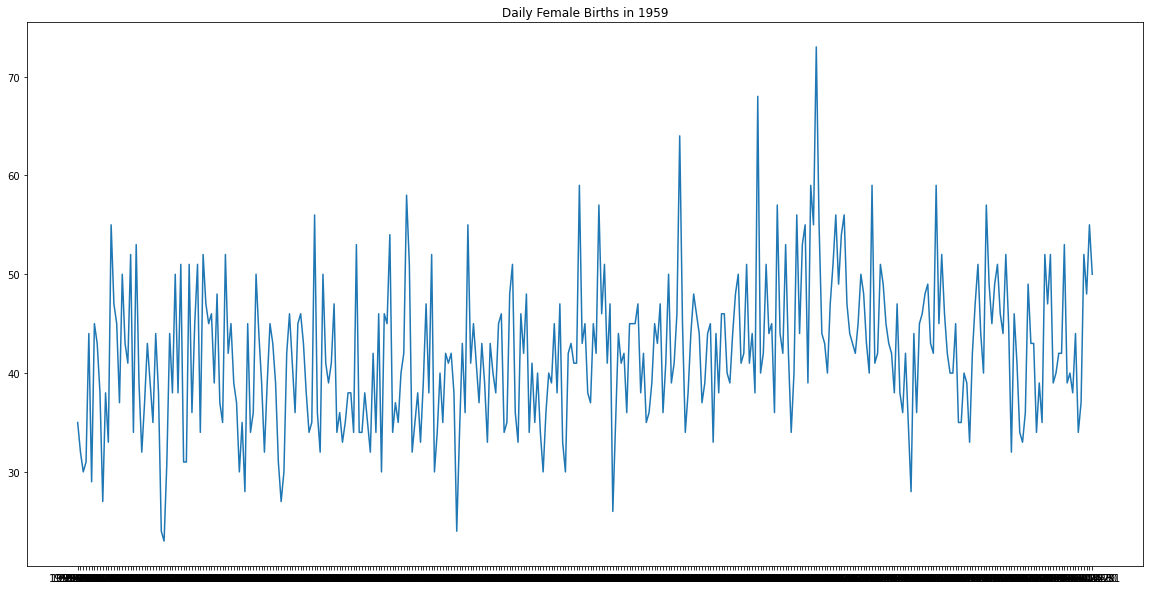

In [36]:
plt.figure(figsize=(20,10))
plt.plot(df['ds'], df['y']);
plt.title('Daily Female Births in 1959')
plt.show()

In [37]:
from fbprophet import Prophet

In [54]:
model=Prophet(  yearly_seasonality=True,   weekly_seasonality=False)

In [55]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [65]:
future = model.make_future_dataframe(periods=90, freq='d')
future.tail()

ds
450 1960-03-26
451 1960-03-27
452 1960-03-28
453 1960-03-29
454 1960-03-30

In [66]:
prediction=model.predict(future_dates)

In [67]:
prediction.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1959-01-01  34.742551   26.123000   43.236841    34.742551    34.742551   
1 1959-01-02  34.782370   27.233488   44.477894    34.782370    34.782370   
2 1959-01-03  34.822190   28.191776   44.975242    34.822190    34.822190   
3 1959-01-04  34.862009   28.760273   45.720263    34.862009    34.862009   
4 1959-01-05  34.901829   29.246379   46.699438    34.901829    34.901829   

   additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0        0.073784              0.073784              0.073784  0.073784   
1        0.894328              0.894328              0.894328  0.894328   
2        1.683674              1.683674              1.683674  1.683674   
3        2.430401              2.430401              2.430401  2.430401   
4        3.124064              3.124064              3.124064  3.124064   

   yearly_lower  yearly_upper  multiplicative_terms  \
0      0.073784      0.073784                   0.0   
1      0.894328      0.894328                   0.0   
2      1.683674      1.683674                   0.0   
3      2.430401      2.430401                   0.0   
4      3.124064      3.124064                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                         0.0                         0.0  34.816335  
1                         0.0                         0.0  35.676698  
2                         0.0                         0.0  36.505864  
3                         0.0                         0.0  37.292410  
4                         0.0                         0.0  38.025892

<ipython-input-69-f3083be353af>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


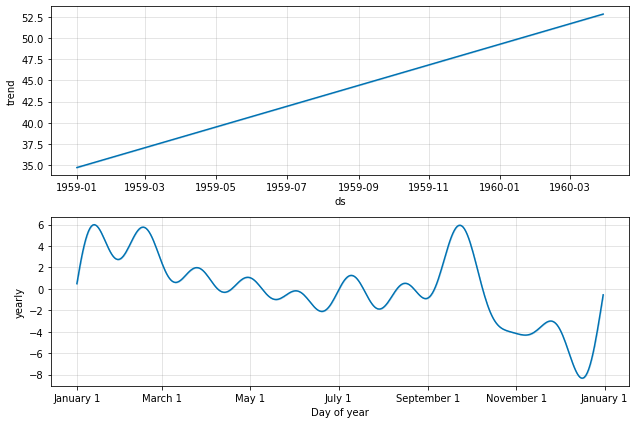

In [69]:
fig2=model.plot_components(prediction)
fig2.show()

<ipython-input-70-ace64c22c9b2>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


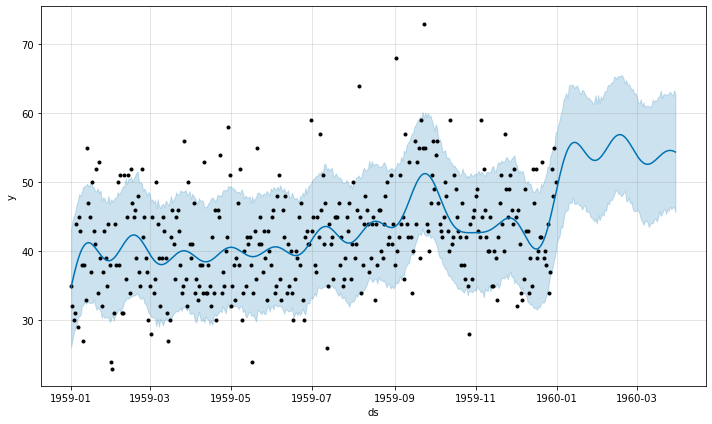

In [70]:
fig3=model.plot(prediction)
fig3.show()

In [71]:
from fbprophet.plot import plot_plotly
#let's plot the forecast
plot_plotly(model, prediction)